In [1]:
import re,string
import csv
import string
import numpy as np
import preprocessor as p
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('data_final_revisi_pre.csv', sep=';')
print(data)

                                                    text category
0      selamat kerja kabinet jokowi maruf kerja lurus...  positif
1      selamat nadiem anwar makarim menteri didik bud...  positif
2      pasca lantik kabinet indonesia maju jilid ii p...  negatif
3      visi misi menteri visi misi presiden wakil pre...  positif
4      tenang jokowi pilih menteri bukan asal yakin p...  positif
5       jadi hilang rasa kalo bukan buk sus jadi menteri  negatif
6                                  menteri rasa presiden  positif
7      banyak kejut sesuai harap selamat buat bapak p...  positif
8      masalah sama sekali bu ibu sukses bikin standa...  positif
9      ibu pilih jajar kabinet jokowi maruf sungguh s...  positif
10     wahai wakil rakyat menteri baru juang kaum mis...  positif
11         rakyat hibur segala bantuann presiden menteri  positif
12     edy prabowo jadi tri kkp mudah bukan politik d...  positif
13     selamat pak nadiem makarim jadi menteri didik ...  positif
14        

In [3]:
data = data.copy()
data['category_id'] = data['category'].factorize()[0]+1
category_id = data[['category', 'category_id']].drop_duplicates().sort_values('category_id')
id_to_category = dict(category_id[['category_id', 'category']].values)
print(id_to_category)
#print(data)

{1: 'positif', 2: 'negatif'}


In [1]:
data.groupby('category').size()

NameError: name 'data' is not defined

In [4]:
# TFIDF Setting
tfidf = TfidfVectorizer(sublinear_tf=False, min_df=1, norm='l2', encoding='utf-8', ngram_range=(1, 1))

# TFIDF
features = tfidf.fit_transform(data['text'].values.astype('U')).toarray()
labels = data.category_id

# Print hasil TFIDF
# featuresName = tfidf.get_feature_names()
# indexTitle = [n for n in data['text']]
# rows, cols = features.nonzero()
    
# for row, col in zip(rows, cols):
#     print("Doc",row, "TFIDF", (featuresName[col], indexTitle[row]), features[row, col])
# print(features.shape)
# print(len(features))

KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 1342  1343  1344 ... 13417 13418 13419] 
TEST : [   0    1    2 ... 1339 1340 1341]


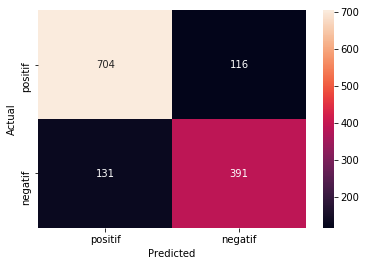

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.84      0.86      0.85       820
    negatif       0.77      0.75      0.76       522

avg / total       0.82      0.82      0.82      1342

Akurasi Model 81.59 %
##########
Fold  2
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [1342 1343 1344 ... 2681 2682 2683]


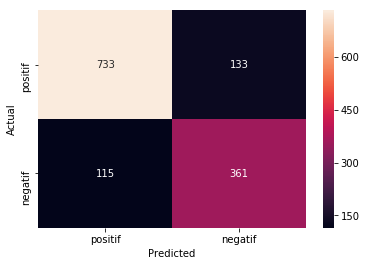

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.86      0.85      0.86       866
    negatif       0.73      0.76      0.74       476

avg / total       0.82      0.82      0.82      1342

Akurasi Model 81.52 %
##########
Fold  3
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [2684 2685 2686 ... 4023 4024 4025]


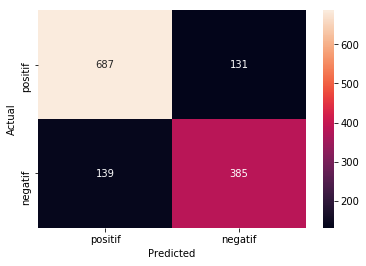

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.84      0.84       818
    negatif       0.75      0.73      0.74       524

avg / total       0.80      0.80      0.80      1342

Akurasi Model 79.88 %
##########
Fold  4
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [4026 4027 4028 ... 5365 5366 5367]


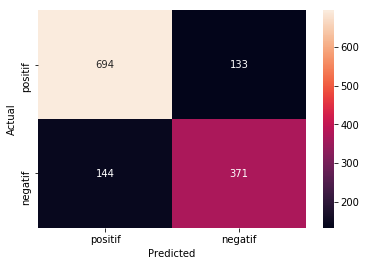

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.84      0.83       827
    negatif       0.74      0.72      0.73       515

avg / total       0.79      0.79      0.79      1342

Akurasi Model 79.36 %
##########
Fold  5
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [5368 5369 5370 ... 6707 6708 6709]


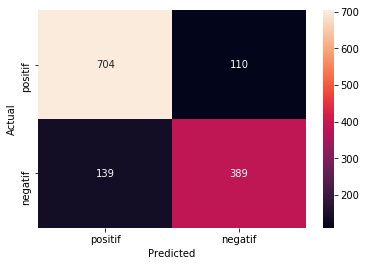

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.84      0.86      0.85       814
    negatif       0.78      0.74      0.76       528

avg / total       0.81      0.81      0.81      1342

Akurasi Model 81.45 %
##########
Fold  6
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [6710 6711 6712 ... 8049 8050 8051]


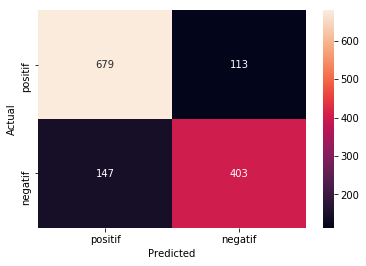

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.86      0.84       792
    negatif       0.78      0.73      0.76       550

avg / total       0.81      0.81      0.81      1342

Akurasi Model 80.63 %
##########
Fold  7
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [8052 8053 8054 ... 9391 9392 9393]


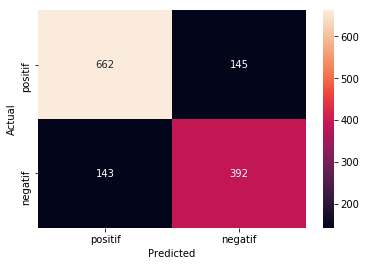

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.82      0.82       807
    negatif       0.73      0.73      0.73       535

avg / total       0.79      0.79      0.79      1342

Akurasi Model 78.54 %
##########
Fold  8
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [ 9394  9395  9396 ... 10733 10734 10735]


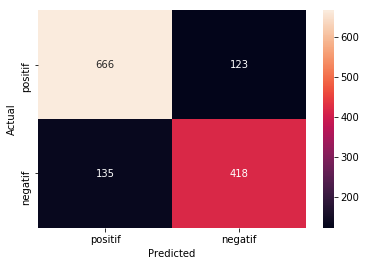

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.84      0.84       789
    negatif       0.77      0.76      0.76       553

avg / total       0.81      0.81      0.81      1342

Akurasi Model 80.77 %
##########
Fold  9
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [10736 10737 10738 ... 12075 12076 12077]


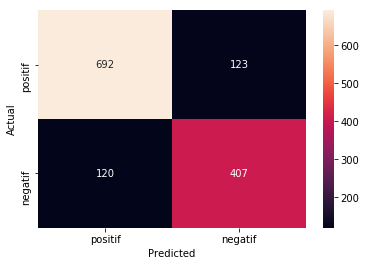

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.85      0.85      0.85       815
    negatif       0.77      0.77      0.77       527

avg / total       0.82      0.82      0.82      1342

Akurasi Model 81.89 %
##########
Fold  10
TRAIN : [    0     1     2 ... 12075 12076 12077] 
TEST : [12078 12079 12080 ... 13417 13418 13419]


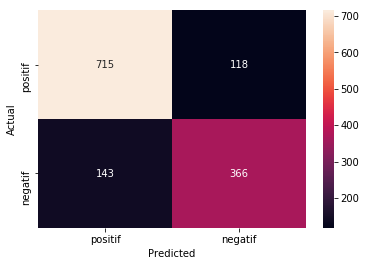

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.86      0.85       833
    negatif       0.76      0.72      0.74       509

avg / total       0.80      0.81      0.80      1342

Akurasi Model 80.55 %
##########
shape x_train : (12078, 13480)
shape x_test : (1342, 13480)


In [6]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average

#svm = SVC(kernel='linear', C=5)
svm = KNeighborsClassifier(n_neighbors=5)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    svm.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, svm.predict(x_test)
    y_pred = svm.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = svm.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 1342  1343  1344 ... 13417 13418 13419] 
TEST : [   0    1    2 ... 1339 1340 1341]


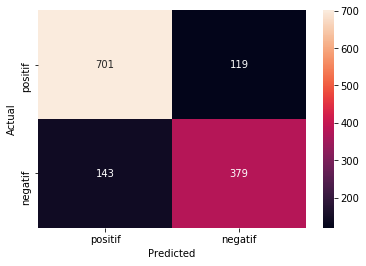

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.85      0.84       820
    negatif       0.76      0.73      0.74       522

avg / total       0.80      0.80      0.80      1342

Akurasi Model 80.48 %
##########
Fold  2
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [1342 1343 1344 ... 2681 2682 2683]


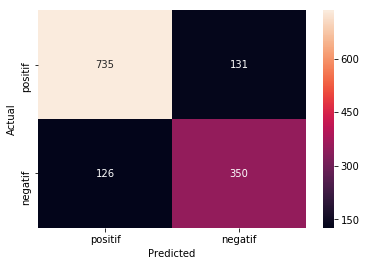

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.85      0.85      0.85       866
    negatif       0.73      0.74      0.73       476

avg / total       0.81      0.81      0.81      1342

Akurasi Model 80.85 %
##########
Fold  3
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [2684 2685 2686 ... 4023 4024 4025]


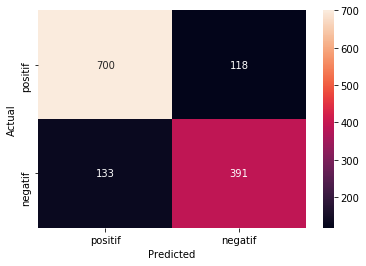

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.84      0.86      0.85       818
    negatif       0.77      0.75      0.76       524

avg / total       0.81      0.81      0.81      1342

Akurasi Model 81.3 %
##########
Fold  4
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [4026 4027 4028 ... 5365 5366 5367]


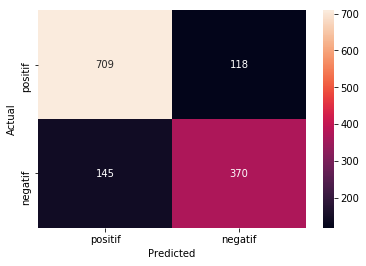

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.86      0.84       827
    negatif       0.76      0.72      0.74       515

avg / total       0.80      0.80      0.80      1342

Akurasi Model 80.4 %
##########
Fold  5
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [5368 5369 5370 ... 6707 6708 6709]


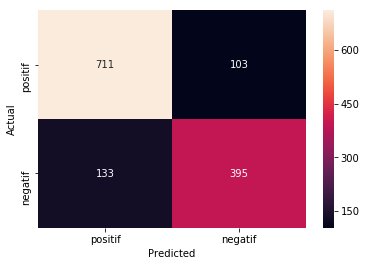

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.84      0.87      0.86       814
    negatif       0.79      0.75      0.77       528

avg / total       0.82      0.82      0.82      1342

Akurasi Model 82.41 %
##########
Fold  6
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [6710 6711 6712 ... 8049 8050 8051]


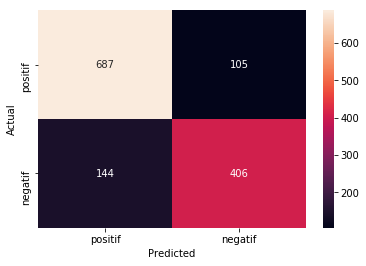

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.87      0.85       792
    negatif       0.79      0.74      0.77       550

avg / total       0.81      0.81      0.81      1342

Akurasi Model 81.45 %
##########
Fold  7
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [8052 8053 8054 ... 9391 9392 9393]


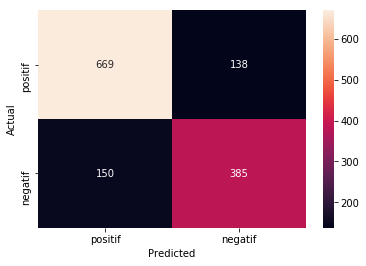

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.82      0.83      0.82       807
    negatif       0.74      0.72      0.73       535

avg / total       0.78      0.79      0.78      1342

Akurasi Model 78.54 %
##########
Fold  8
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [ 9394  9395  9396 ... 10733 10734 10735]


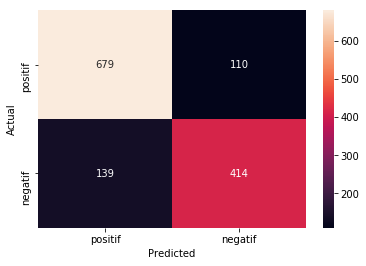

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.83      0.86      0.85       789
    negatif       0.79      0.75      0.77       553

avg / total       0.81      0.81      0.81      1342

Akurasi Model 81.45 %
##########
Fold  9
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [10736 10737 10738 ... 12075 12076 12077]


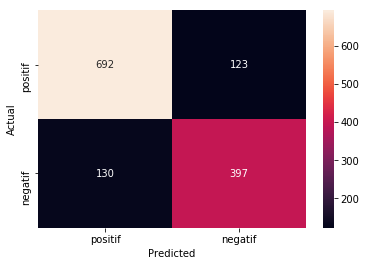

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.84      0.85      0.85       815
    negatif       0.76      0.75      0.76       527

avg / total       0.81      0.81      0.81      1342

Akurasi Model 81.15 %
##########
Fold  10
TRAIN : [    0     1     2 ... 12075 12076 12077] 
TEST : [12078 12079 12080 ... 13417 13418 13419]


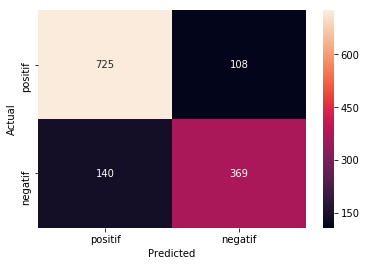

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
             precision    recall  f1-score   support

    positif       0.84      0.87      0.85       833
    negatif       0.77      0.72      0.75       509

avg / total       0.81      0.82      0.81      1342

Akurasi Model 81.52 %
##########
shape x_train : (12078, 13480)
shape x_test : (1342, 13480)


In [7]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average

#svm = SVC(kernel='linear', C=5)
svm = KNeighborsClassifier(n_neighbors=7)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    svm.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, svm.predict(x_test)
    y_pred = svm.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = svm.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)


KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 1342  1343  1344 ... 13417 13418 13419] 
TEST : [   0    1    2 ... 1339 1340 1341]


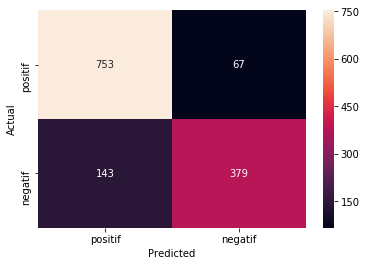

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.84      0.92      0.88       820
    negatif       0.85      0.73      0.78       522

avg / total       0.84      0.84      0.84      1342

Akurasi Model 84.35 %
##########
Fold  2
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [1342 1343 1344 ... 2681 2682 2683]


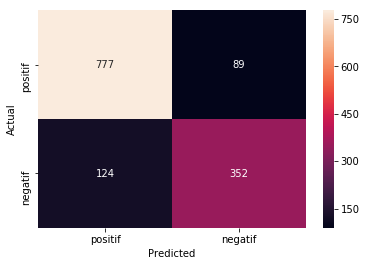

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.86      0.90      0.88       866
    negatif       0.80      0.74      0.77       476

avg / total       0.84      0.84      0.84      1342

Akurasi Model 84.13 %
##########
Fold  3
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [2684 2685 2686 ... 4023 4024 4025]


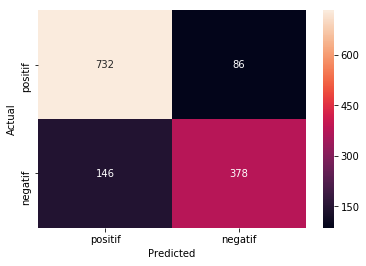

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.83      0.89      0.86       818
    negatif       0.81      0.72      0.77       524

avg / total       0.83      0.83      0.82      1342

Akurasi Model 82.71 %
##########
Fold  4
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [4026 4027 4028 ... 5365 5366 5367]


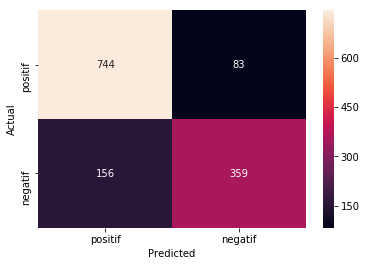

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.83      0.90      0.86       827
    negatif       0.81      0.70      0.75       515

avg / total       0.82      0.82      0.82      1342

Akurasi Model 82.19 %
##########
Fold  5
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [5368 5369 5370 ... 6707 6708 6709]


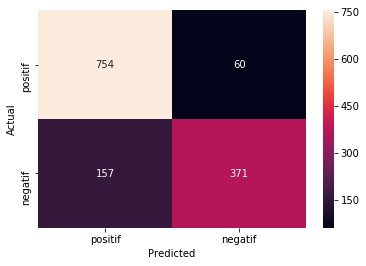

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.83      0.93      0.87       814
    negatif       0.86      0.70      0.77       528

avg / total       0.84      0.84      0.83      1342

Akurasi Model 83.83 %
##########
Fold  6
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [6710 6711 6712 ... 8049 8050 8051]


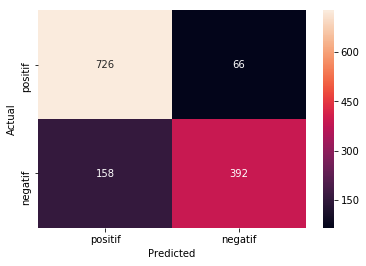

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.82      0.92      0.87       792
    negatif       0.86      0.71      0.78       550

avg / total       0.84      0.83      0.83      1342

Akurasi Model 83.31 %
##########
Fold  7
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [8052 8053 8054 ... 9391 9392 9393]


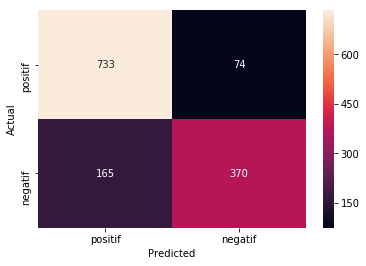

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.82      0.91      0.86       807
    negatif       0.83      0.69      0.76       535

avg / total       0.82      0.82      0.82      1342

Akurasi Model 82.19 %
##########
Fold  8
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [ 9394  9395  9396 ... 10733 10734 10735]


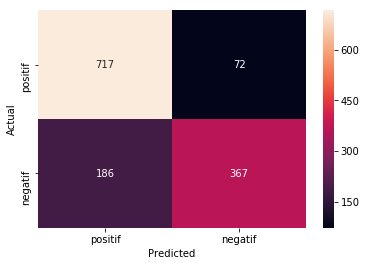

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.79      0.91      0.85       789
    negatif       0.84      0.66      0.74       553

avg / total       0.81      0.81      0.80      1342

Akurasi Model 80.77 %
##########
Fold  9
TRAIN : [    0     1     2 ... 13417 13418 13419] 
TEST : [10736 10737 10738 ... 12075 12076 12077]


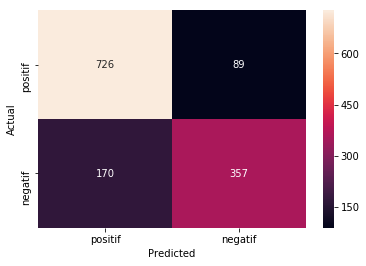

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.81      0.89      0.85       815
    negatif       0.80      0.68      0.73       527

avg / total       0.81      0.81      0.80      1342

Akurasi Model 80.7 %
##########
Fold  10
TRAIN : [    0     1     2 ... 12075 12076 12077] 
TEST : [12078 12079 12080 ... 13417 13418 13419]


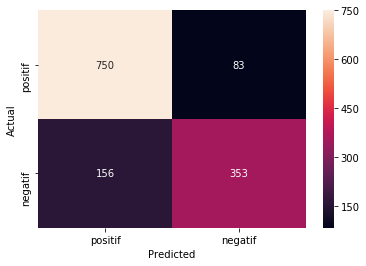

--------------Specification Model ! --------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

    positif       0.83      0.90      0.86       833
    negatif       0.81      0.69      0.75       509

avg / total       0.82      0.82      0.82      1342

Akurasi Model 82.19 %
##########
shape x_train : (12078, 13480)
shape x_test : (1342, 13480)


In [7]:
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
# from multiscorer import MultiScorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, hamming_loss
from numpy import average
from sklearn.ensemble import RandomForestClassifier

#svm = SVC(kernel='linear', C=5)
#svm = KNeighborsClassifier(n_neighbors=7)
clf_rf = RandomForestClassifier(max_depth=50, n_estimators=100)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(features):
    print("Fold ", i)
    print("TRAIN :", train_index,"\n" 
          "TEST :", test_index)
    x_train=features[train_index]
    x_test=features[test_index]
    y_train=labels[train_index]
    y_test=labels[test_index]
    i+=1
    
    
    clf_rf.fit(x_train, y_train)
#     print (confusion_matrix(y_test, svm.predict(x_test)))
    
    y_true, y_pred = y_test, clf_rf.predict(x_test)
    y_pred = clf_rf.predict(x_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    ClfModel = clf_rf.fit(features, labels)

    print('--------------Specification Model ! --------------\n', ClfModel)
    print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
    print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')
    print(10* '#')
    
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)

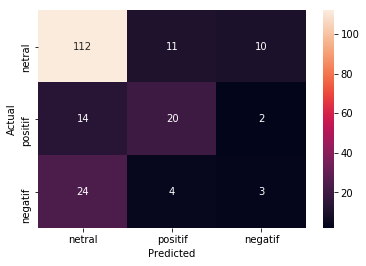

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

      netral       0.75      0.84      0.79       133
     positif       0.57      0.56      0.56        36
     negatif       0.20      0.10      0.13        31

    accuracy                           0.68       200
   macro avg       0.51      0.50      0.50       200
weighted avg       0.63      0.68      0.65       200

Akurasi Model 67.5 %
Komponen training set = Counter({1: 499, 2: 170, 3: 131})
Komponen testing set = Counter({1: 133, 2: 36, 3: 31})


In [5]:
# klasifikasi 5-NN

# Tranning
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=5, shuffle=True)
Model = KNeighborsClassifier(n_neighbors=5)
# Model = LinearSVC(C=0.9)
Model.fit(Xtrain, Ytrain)
y_true, y_pred = Ytest, Model.predict(Xtest)
Ypred = Model.predict(Xtest)

# Confusion Matrix
conf_mat = confusion_matrix(Ytest, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
ClfModel = Model.fit(features, labels)

print('--------------Specification Model ! --------------\n', ClfModel)
print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')

# print(Xtrain.shape)
# print(Ytrain.shape)

print ("Komponen training set = {}" .format(Counter(Ytrain)))
print ("Komponen testing set = {}" .format(Counter(Ytest)))

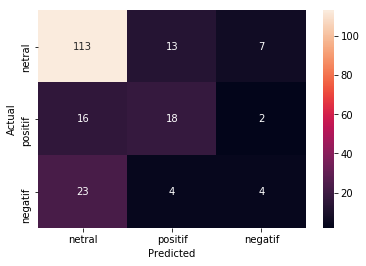

--------------Specification Model ! --------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

      netral       0.74      0.85      0.79       133
     positif       0.51      0.50      0.51        36
     negatif       0.31      0.13      0.18        31

    accuracy                           0.68       200
   macro avg       0.52      0.49      0.49       200
weighted avg       0.63      0.68      0.65       200

Akurasi Model 67.5 %
Komponen training set = Counter({1: 499, 2: 170, 3: 131})
Komponen testing set = Counter({1: 133, 2: 36, 3: 31})


In [6]:
#klasifikasi 7-NN

Model = KNeighborsClassifier(n_neighbors=7)
# Model = LinearSVC(C=0.9)
Model.fit(Xtrain, Ytrain)
y_true, y_pred = Ytest, Model.predict(Xtest)
Ypred = Model.predict(Xtest)


# Confusion Matrix
conf_mat = confusion_matrix(Ytest, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
ClfModel = Model.fit(features, labels)

print('--------------Specification Model ! --------------\n', ClfModel)
print(metrics.classification_report(y_true, y_pred, target_names=data['category'].unique()))
print('Akurasi Model', round(metrics.accuracy_score(y_true, y_pred) * 100, 2), '%')

# print(Xtrain.shape)
# print(Ytrain.shape)

print ("Komponen training set = {}" .format(Counter(Ytrain)))
print ("Komponen testing set = {}" .format(Counter(Ytest)))

In [7]:
#training random forest

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=5, shuffle=True)


# clf_dt = DecisionTreeClassifier(max_depth=5, criterion='entropy')
# clf_dt.fit(X_train, y_train)

clf_rf = RandomForestClassifier(max_depth=50, n_estimators=100, max_features='auto')
clf_rf.fit(X_train, y_train)



print (X_train.shape)
print (X_test.shape)

print ("Komponen training set = {}" .format(Counter(y_train)))
print ("Komponen testing set = {}" .format(Counter(y_test)))


(800, 3009)
(200, 3009)
Komponen training set = Counter({1: 499, 2: 170, 3: 131})
Komponen testing set = Counter({1: 133, 2: 36, 3: 31})


In [8]:
#cetak tree ke N

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from subprocess import check_call
import pydotplus

estimator = clf_rf.estimators_[15]

dot_data = StringIO()
export_graphviz (estimator, out_file='hasil.dot',
                  class_names=category_id.category.values,
                rounded=True, proportion=False, precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'bisa.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

C:\Users\Hendra\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)



^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


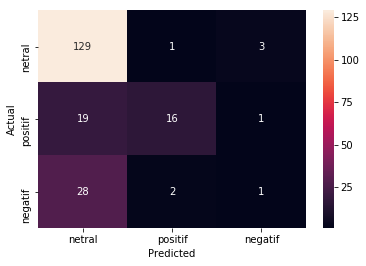

              precision    recall  f1-score   support

           1       0.73      0.97      0.83       133
           2       0.84      0.44      0.58        36
           3       0.20      0.03      0.06        31

    accuracy                           0.73       200
   macro avg       0.59      0.48      0.49       200
weighted avg       0.67      0.73      0.67       200

Akurasi Model 73.0 %


In [9]:
#testing random forest

#y_pred = clf_dt.predict(X_test)

y_pred = clf_rf.predict(X_test)


# Confusion Matrix
conf_matr = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matr, annot=True, fmt='d', xticklabels=category_id.category.values, yticklabels=category_id.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


print(classification_report(y_test, y_pred))
print('Akurasi Model', round(metrics.accuracy_score(y_test, y_pred) * 100, 2), '%')
